# Ensemble Techniques | Project | Parkinson’s Disease (PD) 

The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

#### 1.Load the data set

In [2]:
df_PD = pd.read_csv('G:\Residency 4\EnsembleTech_Project_11-30\Data\parkinsons.data')

#### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file,numberof attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [3]:
df_PD.shape

(195, 24)

In [4]:
df_PD.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
#Since coloumn "name" is not useful for this analysis, so making it as index.
df_PD = df_PD.set_index('name')

 195 rows and 23 columns in the given dataset.

In [6]:
df_PD.head().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(%),0.007840,0.009680,0.010500,0.009970,0.012840
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000


In [7]:
#changing the column names for the suitability.
df_PD.columns = ['Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']

In [8]:
# we want status(dependent var) at the end . So reordering the attributes of the dataframe.
# Reordering columns to make status as last column.

df_PD = df_PD[['Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]

In [9]:
df_PD.head(3).T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3
Fo,119.992000,122.400000,116.682000
Fhi,157.302000,148.650000,131.111000
Flo,74.997000,113.819000,111.555000
Jitter(%),0.007840,0.009680,0.010500
Jitter(Abs),0.000070,0.000080,0.000090
RAP,0.003700,0.004650,0.005440
PPQ,0.005540,0.006960,0.007810
DDP,0.011090,0.013940,0.016330
Shimmer,0.043740,0.061340,0.052330
Shimmer(dB),0.426000,0.626000,0.482000


In [10]:
df_PD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
Fo             195 non-null float64
Fhi            195 non-null float64
Flo            195 non-null float64
Jitter(%)      195 non-null float64
Jitter(Abs)    195 non-null float64
RAP            195 non-null float64
PPQ            195 non-null float64
DDP            195 non-null float64
Shimmer        195 non-null float64
Shimmer(dB)    195 non-null float64
APQ3           195 non-null float64
APQ5           195 non-null float64
APQ            195 non-null float64
DDA            195 non-null float64
NHR            195 non-null float64
HNR            195 non-null float64
RPDE           195 non-null float64
DFA            195 non-null float64
spread1        195 non-null float64
spread2        195 non-null float64
D2             195 non-null float64
PPE            195 non-null float64
status         195 non-null int64
dtypes: float64(22), int64(1)
memory usage: 36.6+ 

From the above information, we observe that all the given features are continuous except 'status'(since given in the description).

In [11]:
df_PD.isnull().sum()

Fo             0
Fhi            0
Flo            0
Jitter(%)      0
Jitter(Abs)    0
RAP            0
PPQ            0
DDP            0
Shimmer        0
Shimmer(dB)    0
APQ3           0
APQ5           0
APQ            0
DDA            0
NHR            0
HNR            0
RPDE           0
DFA            0
spread1        0
spread2        0
D2             0
PPE            0
status         0
dtype: int64

No null or missing value exists in the dataset.

#### 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)


###### Univariate analysis

In [12]:
df_PD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Fhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Flo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


The following attribiutes are slightly right skewed as the central value(mean) is shifted  little right than median.
'Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR'

The following attribiutes are slightly left skewed as the central value(mean) is shifted  little left than median.
'HNR','spread1','spread2','D2','PPE'

The following atributes are occupying almost normally distributed cure as the mean and median have approx same values.
'RPDE','DFA' 

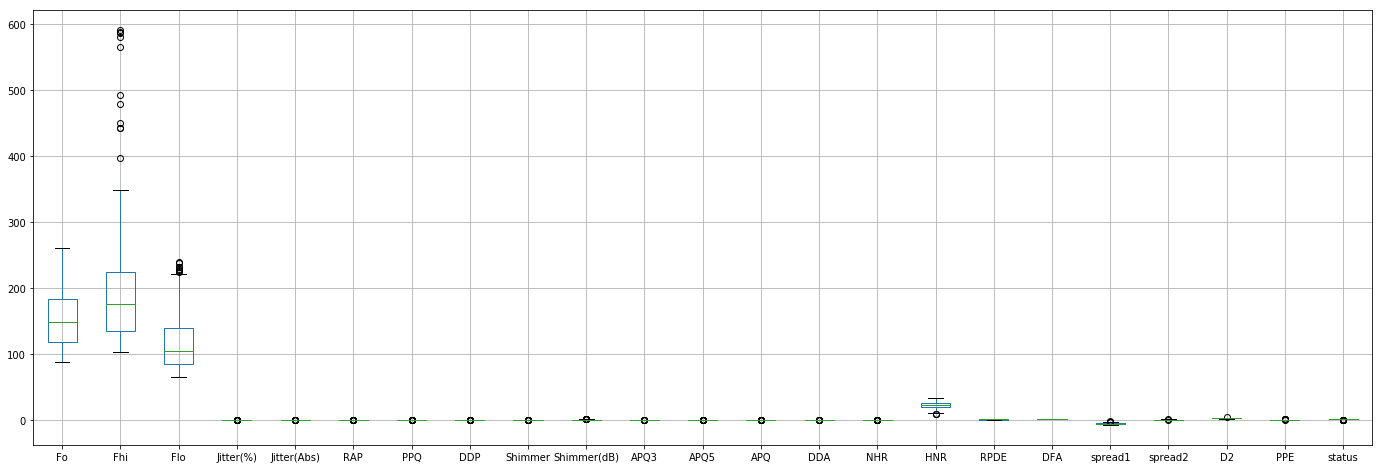

In [13]:
df_PD.boxplot(figsize=(24,8))

This box plots shows that there are less outliers. So, the model will not be much affected by the outliers.
Though we see 'Fhi' has more outliers in comparison to the other attributes.

In [14]:
#outlier detection using IQR
iqr = np.subtract(*np.percentile(df_PD['Fhi'], [75, 25]))
print('IQR for Fhi is : ', iqr)

q25, q75 = np.percentile(df_PD['Fhi'], 25), np.percentile(df_PD['Fhi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_PD['Fhi'] if x < lower or x > upper]
print('Identified outliers for Fhi out of : %d' % len(outliers))

IQR for Fhi is :  89.34299999999999
Identified outliers for Fhi out of : 11


In [15]:
df_PD['status'].value_counts().sort_index()

0     48
1    147
Name: status, dtype: int64

In [16]:
df_PD['status'].value_counts(normalize=True).sort_index()

0    0.246154
1    0.753846
Name: status, dtype: float64

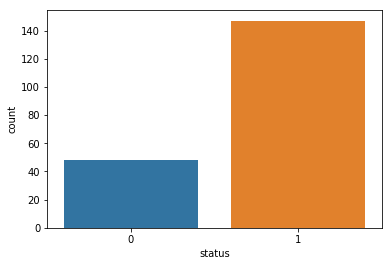

In [17]:
sns.countplot(df_PD['status'])

Most are having Parkinson disease. The ratio is almost 1:3 in favor of status 1. So, the model's ability to predict status 1 will be better than predicting status 0.

###### Bivariate analysis

C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


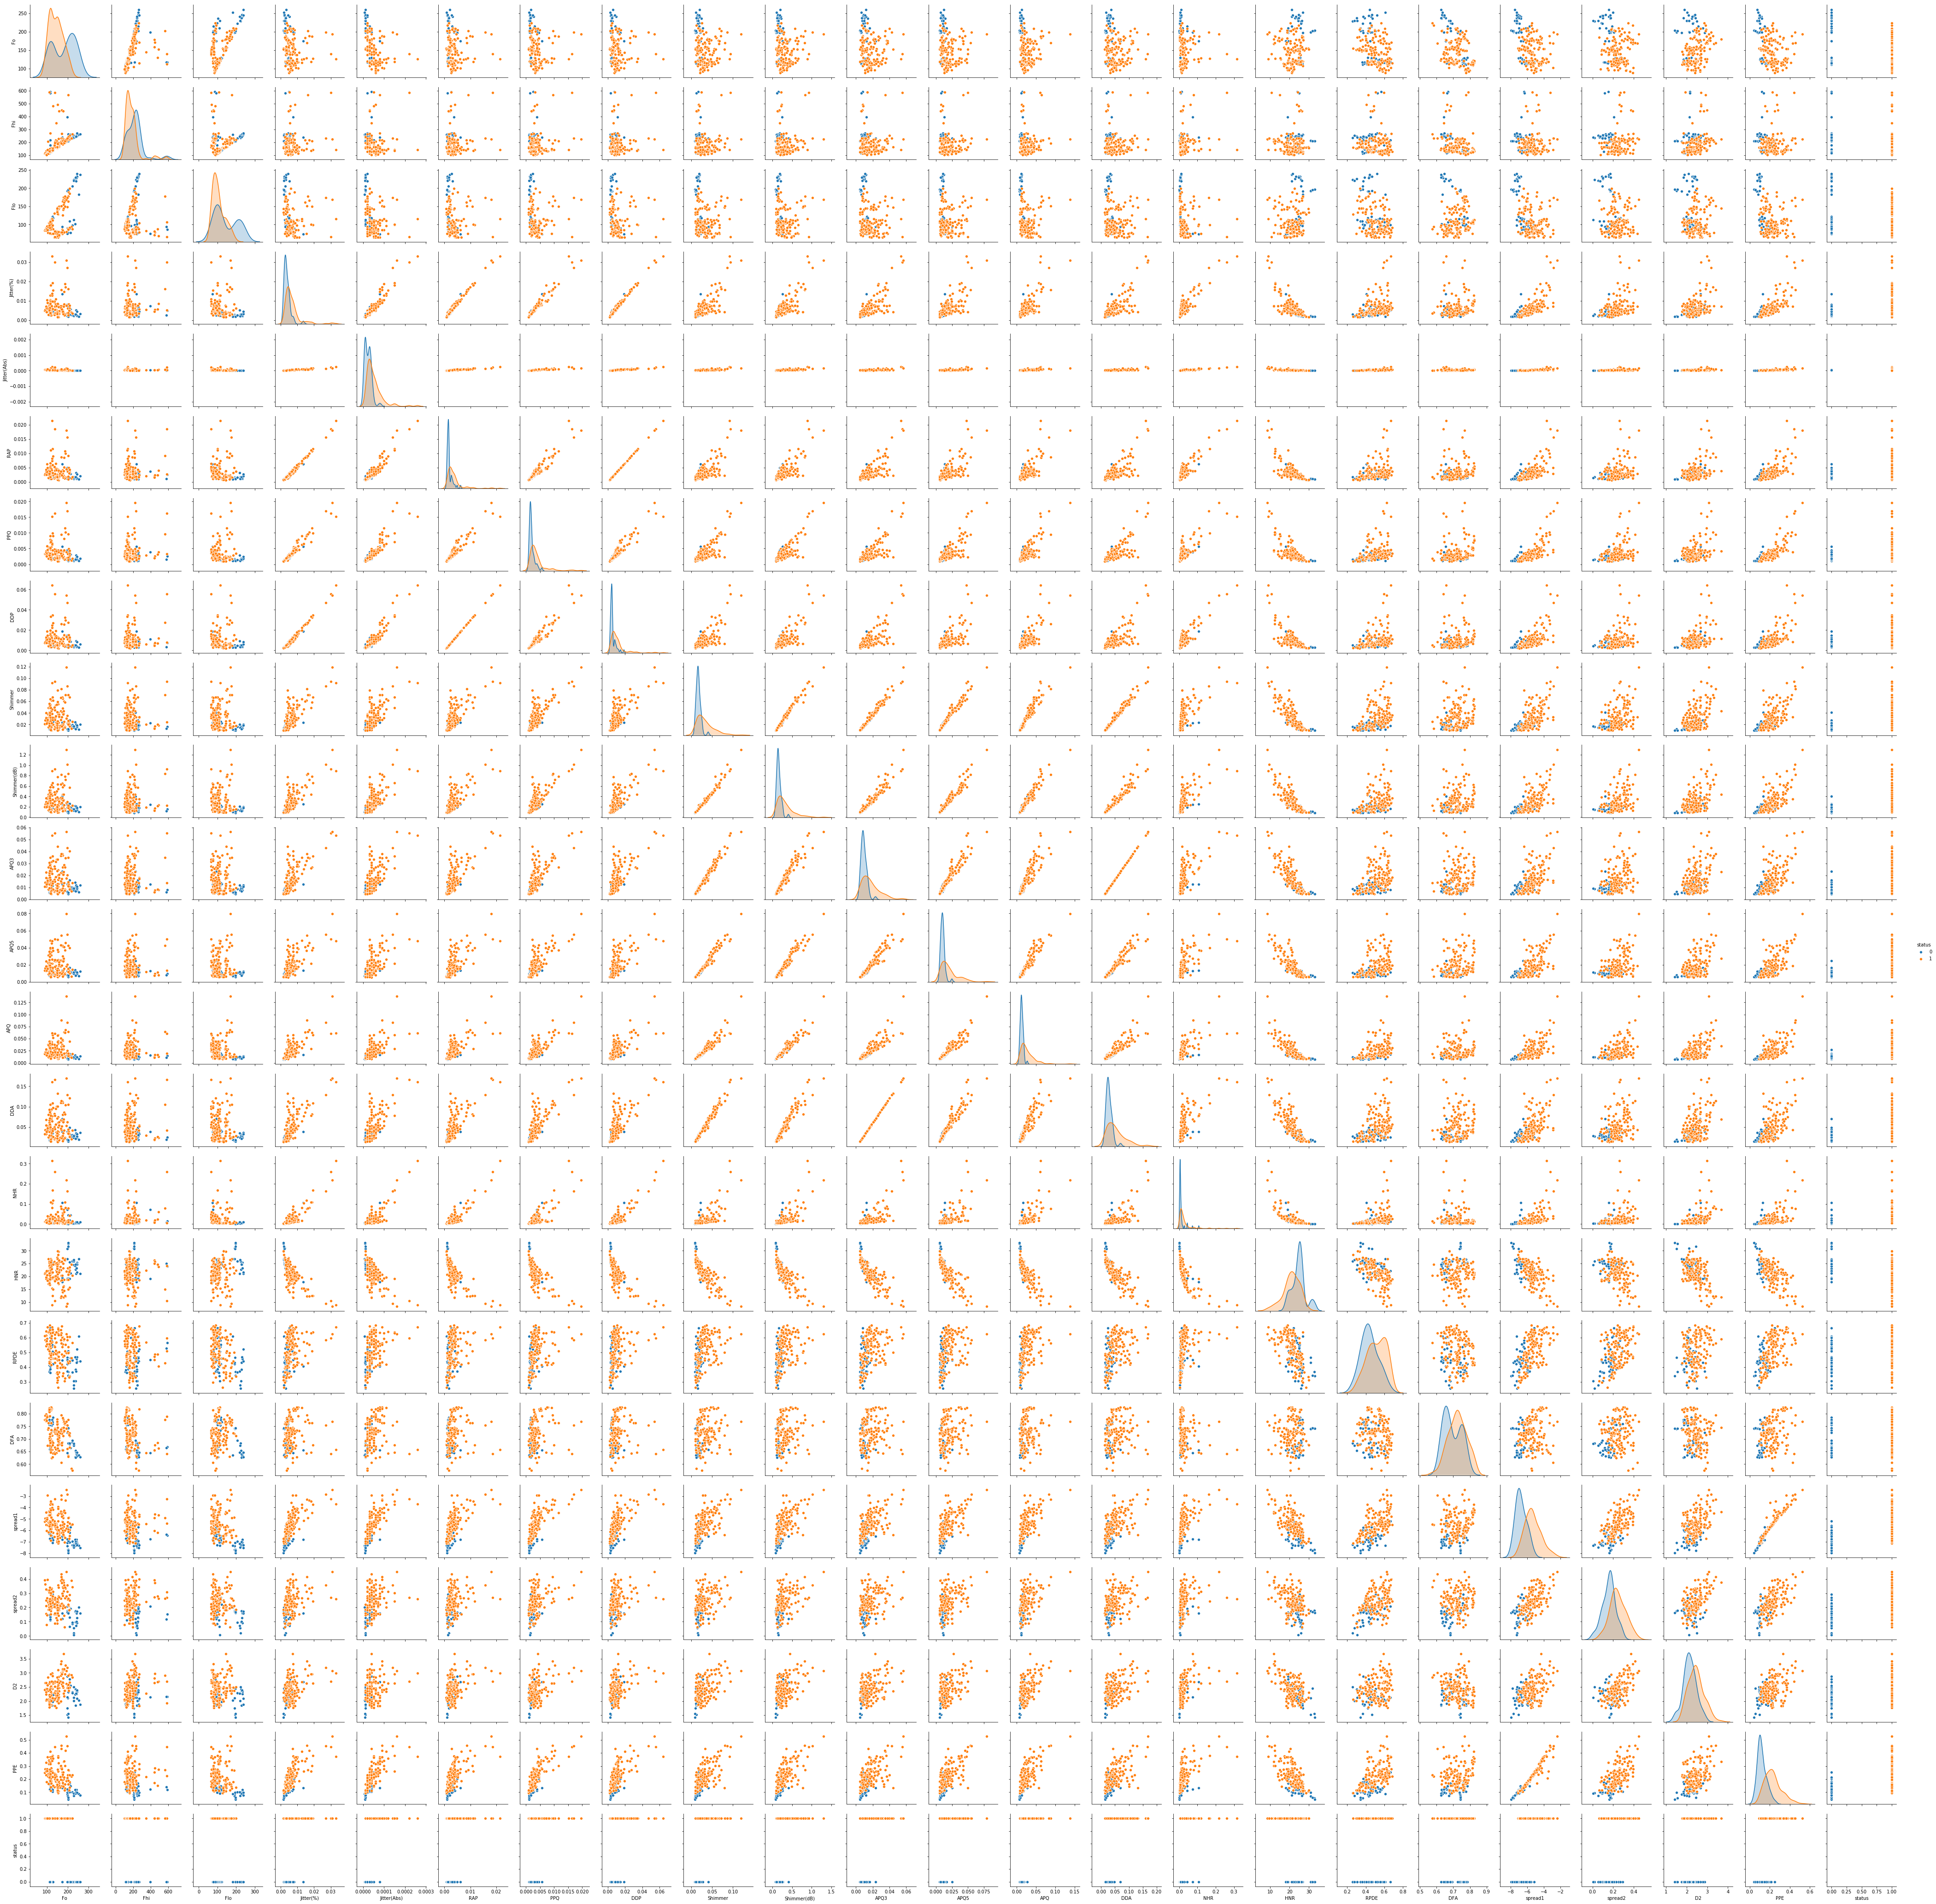

In [18]:
sns.pairplot(df_PD, hue='status')


The pairplot above shows variation for both healthy (BLUE) and people with Parkinson's Disease (ORANGE). 
Some variables have high correlation. Like DDP and RAP (corr = 1), and DDA and APQ3 (corr = 1). HNR seems to have high negative correlation with most of the variables

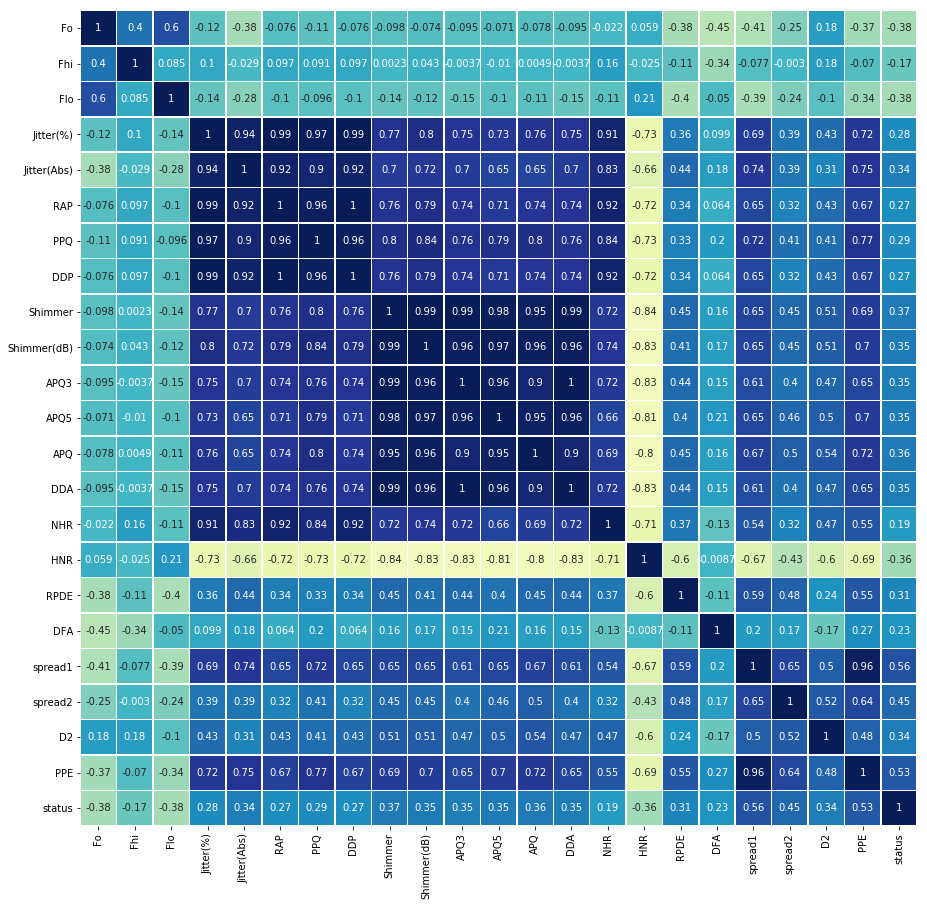

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df_PD.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [20]:
df_PD.corr()

,Fo,Fhi,Flo,Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


From the above table,we observe that 'Fhi'(Maximum vocal fundamental frequency) and 'NHR'(Measure of ratio of noise to tonal components in the voice) are having less correlation(-0.166136 and 0.189429 respectively) with respect to status . So, we can drop these two features based on their correlations

These attributes have very strong correlation among each other {0.99} approx equal to one. One among them can be dropped depending upon the impact in the target prediction.

Jitter% and RAP,
Jitter% and DDP,
Shimmer and Shimmer(dB),
Shimmer and APQ3,
Shimmer and DDP

In [21]:
#dropping columns
#df_PD.drop(axis= 1,columns = ['Fhi','NHR','Jitter%','Shimmer'],inplace = True)

In [22]:
np.round(df_PD.groupby(["status"]).mean() ,5).T

status,0,1
Fo,181.93777,145.18076
Fhi,223.63675,188.44146
Flo,145.20729,106.89356
Jitter(%),0.00387,0.00699
Jitter(Abs),0.00002,0.00005
RAP,0.00192,0.00376
PPQ,0.00206,0.00390
DDP,0.00578,0.01127
Shimmer,0.01762,0.03366
Shimmer(dB),0.16296,0.32120


This analysis shows that healthy people have high vocal fundamental frequency that people with Parkinson's Disease Patients. Variation in amplitude of healthy people are lower than people with Parkinson's Disease.

#### 4.Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [30]:
X = df_PD.drop(['Fhi','NHR','Jitter(%)','Shimmer','status'],axis=1)
#X = df_PD.drop(['Fhi','NHR','status'],axis=1)
y = df_PD['status']

In [31]:
#Splitting the data into train and test in 70/30 ratio with random state as 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 5.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [25]:
#train_char_label = [0, 1]

In [32]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
model_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state= 2 )

In [33]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

#### 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [34]:
model_entropy.score(X_train, y_train) 

1.0

In [35]:
model_entropy.score(X_test, y_test)

0.864406779661017

In [36]:
predicted_test_labels = model_entropy.predict(X_test)

predicted_test_labels

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
pd.crosstab(y_test,predicted_test_labels)


col_0,0,1
status,,
0,14,5
1,3,37


In [38]:
conf_matrix = confusion_matrix(y_test,predicted_test_labels)

conf_matrix

array([[14,  5],
       [ 3, 37]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

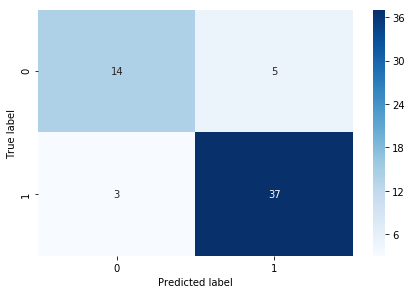

In [39]:

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

The prediction for the class 1 is better than class 0. As, class 0 is underrepresentation in the dataset.

As per crosstab -
Class 0 - correct prediction (16) and incorrect prediction (3)

Class 1 - correct prediction (37) and incorrect prediction (3)

#### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
 

In [40]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 2,max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [41]:
print(clf_pruned.score(X_train, y_train))
print(clf_pruned.score(X_test,y_test))

0.9705882352941176
0.8983050847457628


In [42]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [43]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.9705882352941176
0.8983050847457628


In [44]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned)

In [45]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.898305,0.95


In [46]:
print(confusion_matrix(y_test, preds_pruned))
print(accuracy_score(y_test, preds_pruned))
print(recall_score(y_test, preds_pruned, average="binary"))

[[15  4]
 [ 2 38]]
0.8983050847457628
0.95


Regularization has increased the accuracy and made the model more robust.

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from os import system
import pydotplus
import graphviz

In [48]:
feature_cols = X_train.columns

In [49]:

PD_Tree_File = open('PD_tree.dot','w')
#dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))
dot_data = tree.export_graphviz(clf_pruned,out_file=PD_Tree_File, feature_names = list(X_train), class_names = list(feature_cols))
PD_Tree_File.close()

In [50]:
# used http://webgraphviz.com/

# copied the code from the PD_Tree.dot file to this url and got the below tree.

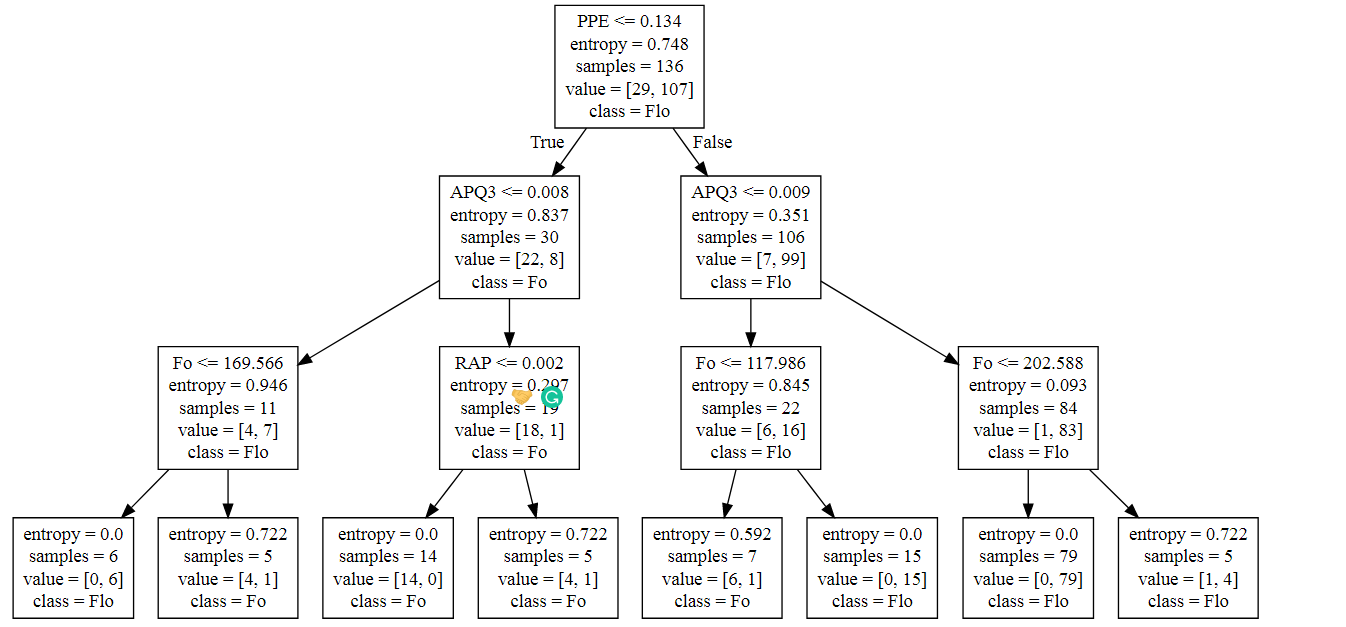

In [51]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                  Imp
Fo           0.215357
Flo          0.000000
Jitter(Abs)  0.000000
RAP          0.000000
PPQ          0.000000
DDP          0.000000
Shimmer(dB)  0.023555
APQ3         0.000000
APQ5         0.000000
APQ          0.000000
DDA          0.228619
HNR          0.000000
RPDE         0.000000
DFA          0.000000
spread1      0.000000
spread2      0.000000
D2           0.000000
PPE          0.532468


This data shows that PPE is most important feature followed by Fo, APQ3 and RAP.

#### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [52]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state= 2)
rfcl = rfcl.fit(X_train, y_train)

In [53]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary")

In [54]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.898305,0.950
0,Random Forest,0.830508,0.975


In [55]:
print(confusion_matrix(y_test, pred_RF))
print(accuracy_score(y_test, pred_RF))
print(recall_score(y_test, pred_RF,average="binary"))

[[10  9]
 [ 1 39]]
0.8305084745762712
0.975


###### Out of Bag Error in Random Forest

In [56]:

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

Automatically created module for IPython interactive environment


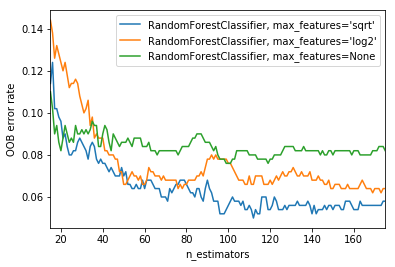

In [57]:
print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

A random forest should have a number of trees between 64 - 128 trees. With that, one should have a good balance between ROC AUC and processing time

In [58]:

rfcl_1 = RandomForestClassifier(n_estimators = 60)
rfcl_1 = rfcl_1.fit(X_train, y_train)
pred_RF_1 = rfcl_1.predict(X_test)
accuracy_score(y_test, pred_RF_1)

0.864406779661017

In [59]:
rfcl_2 = RandomForestClassifier(n_estimators = 128)
rfcl_2 = rfcl_2.fit(X_train, y_train)
pred_RF_2 = rfcl_2.predict(X_test)
accuracy_score(y_test, pred_RF_2)

0.847457627118644

In [60]:
rfcl_3 = RandomForestClassifier(n_estimators = 100)
rfcl_3 = rfcl_3.fit(X_train, y_train)
pred_RF_3 = rfcl_3.predict(X_test)
accuracy_score(y_test, pred_RF_3)

0.8305084745762712

In [61]:
#This is to se the variation of accuracy with the change in number of estimators.
for i in range(50,150):
    rfclf = RandomForestClassifier(n_estimators = i)
    rfclf = rfclf.fit(X_train, y_train)
    pred = rfclf.predict(X_test)
    print(i, "   ", accuracy_score(y_test, pred))

50     0.8305084745762712
51     0.864406779661017
52     0.864406779661017
53     0.8305084745762712
54     0.8135593220338984
55     0.847457627118644
56     0.847457627118644
57     0.8305084745762712
58     0.8813559322033898
59     0.8305084745762712
60     0.864406779661017
61     0.847457627118644
62     0.847457627118644
63     0.8305084745762712
64     0.8305084745762712
65     0.847457627118644
66     0.8983050847457628
67     0.847457627118644
68     0.8305084745762712
69     0.847457627118644
70     0.847457627118644
71     0.8813559322033898
72     0.864406779661017
73     0.8135593220338984
74     0.8305084745762712
75     0.864406779661017
76     0.8305084745762712
77     0.8813559322033898
78     0.847457627118644
79     0.847457627118644
80     0.847457627118644
81     0.847457627118644
82     0.847457627118644
83     0.847457627118644
84     0.847457627118644
85     0.847457627118644
86     0.847457627118644
87     0.8305084745762712
88     0.8305084745762712
89     0

After running this for loop multiple times, one can observe that accuracy varies between 0.81 to 0.88 for all values.